# Brain Stroke Prediction

* A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain become damaged or die.
* A stroke can cause lasting brain damage, long-term disability, or even death

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
data = pd.read_csv("data\Brain_Stroke.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [4]:
# Shape:
data.shape

(5110, 12)

In [5]:
# Information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


## Statistics of the data

In [6]:
# Numerical data:
data.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [7]:
# Categorical data:
data.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
hypertension,5110,2,No,4612
heart_disease,5110,2,No,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892
stroke,5110,2,No,4861


## Handling Null values

In [8]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Removing all the null values in bmi column:
data.dropna(inplace=True)
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Remove id column from the dataset as it is unique to all the rows:

In [10]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes


# Exploratory Data Analysis (EDA)

## Let us plot a pairplot to see the reletionship among numerical data

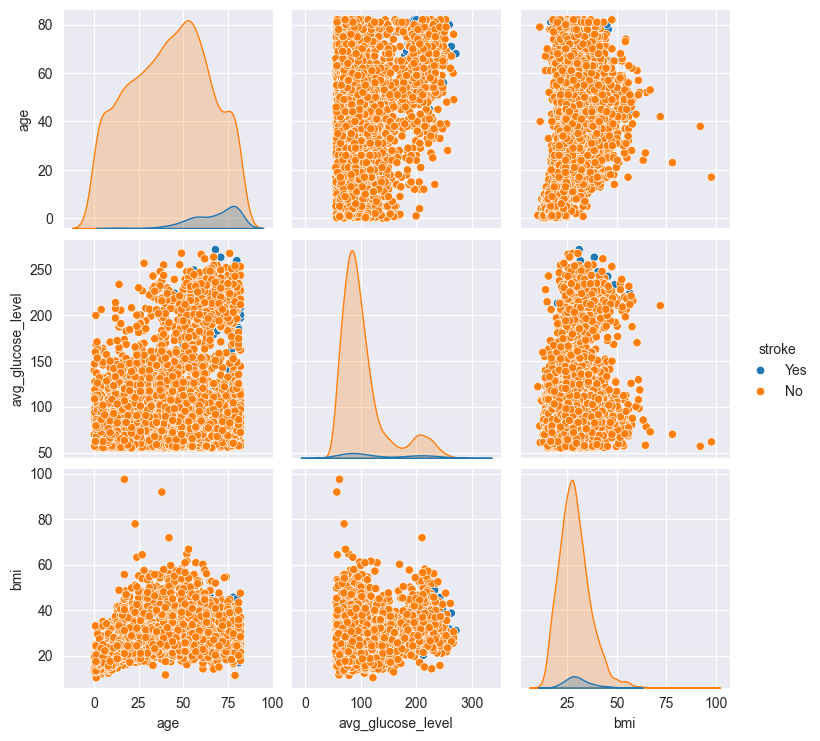

In [11]:
sns.pairplot(data, hue='stroke');

### Gender column

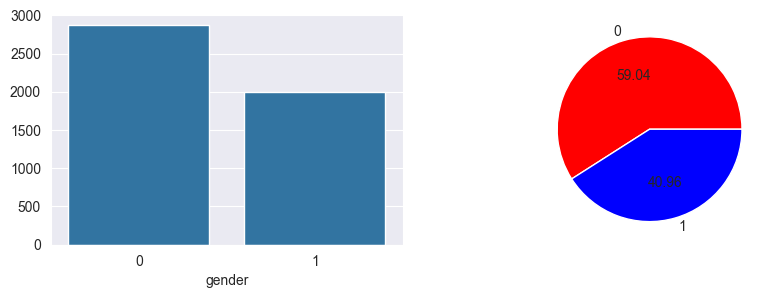

In [69]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.barplot(x=data['gender'].value_counts().index,
            y=data['gender'].value_counts().values)

plt.subplot(122)
plt.pie(x=data['gender'].value_counts().values,
        labels=data['gender'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue','green']);

* Just **0.02%** of data contains 'Other' in 'gender' column. So, it can be dropped

In [13]:
data = data[data['gender']!='Other']

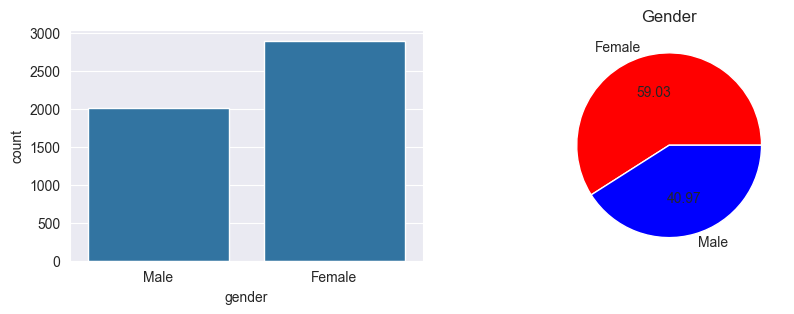

In [17]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.countplot(x=data['gender'])

plt.subplot(122)
plt.title("Gender")
plt.pie(x=data['gender'].value_counts().values,
        labels=data['gender'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue']);

### Hypertension column

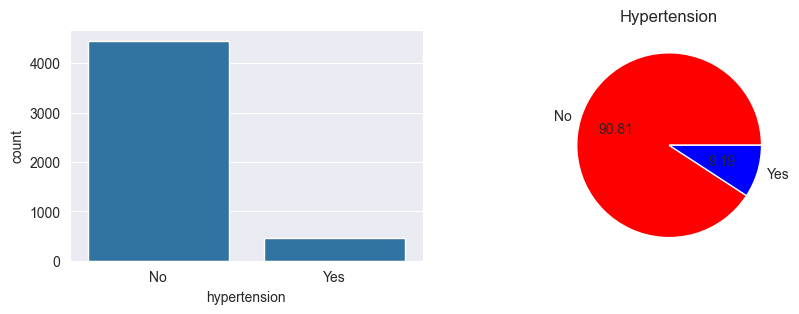

In [20]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.countplot(x=data['hypertension'])

plt.subplot(122)
plt.title("Hypertension")
plt.pie(x=data['hypertension'].value_counts().values,
        labels=data['hypertension'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue']);

### Heart Disease column

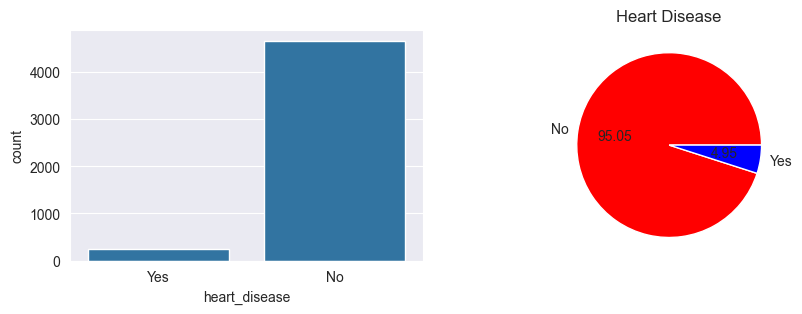

In [21]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.countplot(x=data['heart_disease'])

plt.subplot(122)
plt.title("Heart Disease")
plt.pie(x=data['heart_disease'].value_counts().values,
        labels=data['heart_disease'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue']);

### Ever Married column

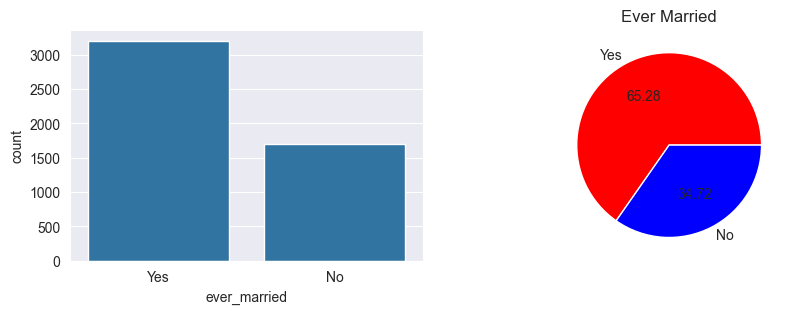

In [22]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.countplot(x=data['ever_married'])

plt.subplot(122)
plt.title("Ever Married")
plt.pie(x=data['ever_married'].value_counts().values,
        labels=data['ever_married'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue']);

### Work Type column

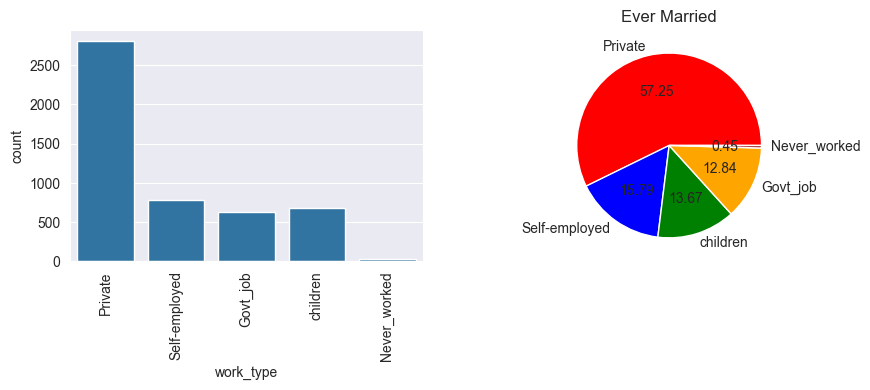

In [23]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.xticks(rotation=90)
sns.countplot(x=data['work_type'])

plt.subplot(122)
plt.title("Ever Married")
plt.pie(x=data['work_type'].value_counts().values,
        labels=data['work_type'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue','green','orange','brown']);

* Just **0.45%** of data contains 'Never_worked' in 'work_type' column. So, it can be dropped.

In [24]:
data = data[data['work_type']!='Never_worked']

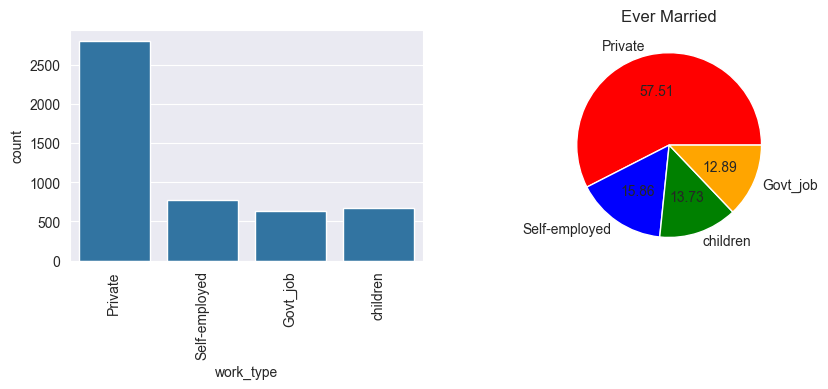

In [25]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.xticks(rotation=90)
sns.countplot(x=data['work_type'])

plt.subplot(122)
plt.title("Ever Married")
plt.pie(x=data['work_type'].value_counts().values,
        labels=data['work_type'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue','green','orange']);

### Residence Type column

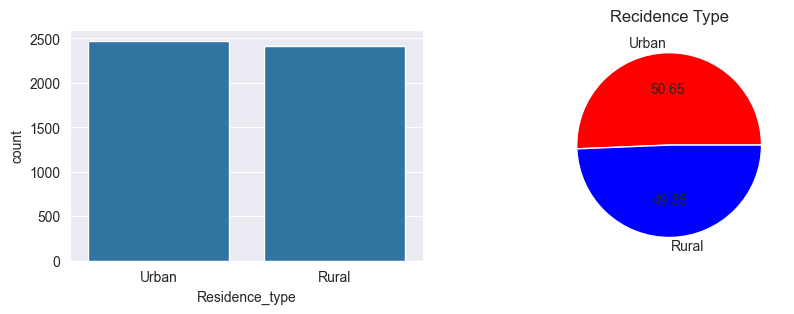

In [26]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.countplot(x=data['Residence_type'])

plt.subplot(122)
plt.title("Recidence Type")
plt.pie(x=data['Residence_type'].value_counts().values,
        labels=data['Residence_type'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue']);

### Smoking Status column

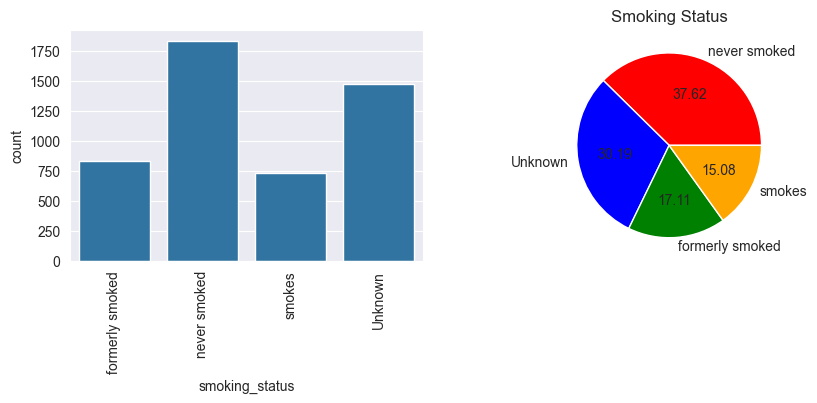

In [27]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.xticks(rotation=90)
sns.countplot(x=data['smoking_status'])

plt.subplot(122)
plt.title("Smoking Status")
plt.pie(x=data['smoking_status'].value_counts().values,
        labels=data['smoking_status'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue','green','orange']);

### Stroke

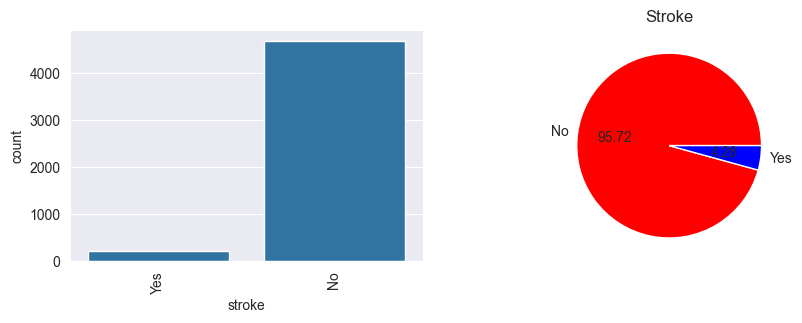

In [28]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.xticks(rotation=90)
sns.countplot(x=data['stroke'])

plt.subplot(122)
plt.title("Stroke")
plt.pie(x=data['stroke'].value_counts().values,
        labels=data['stroke'].value_counts().index,
        autopct='%0.2f',
        colors=['red','blue']);

* **The Dataset is highly imbalance**

### Categorical Fearture Vs Stroke

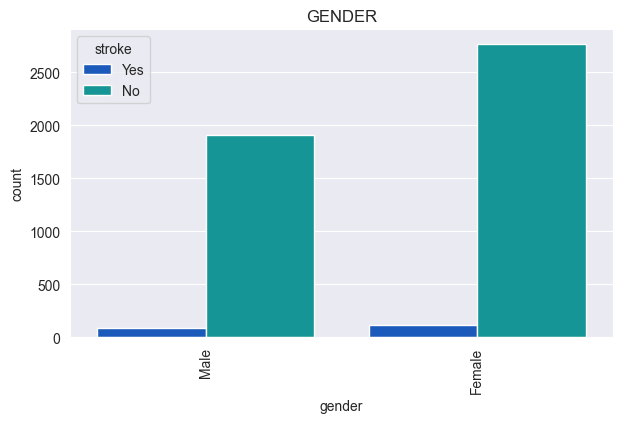

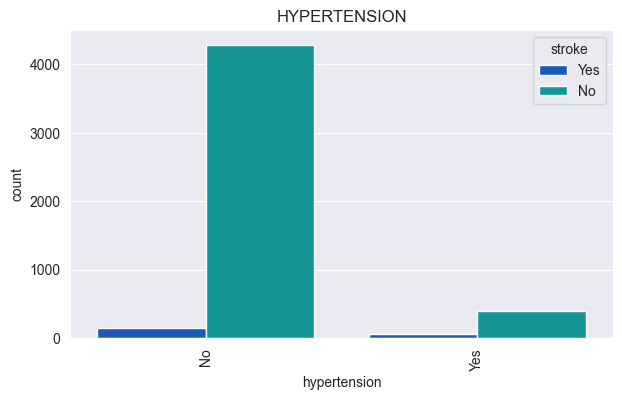

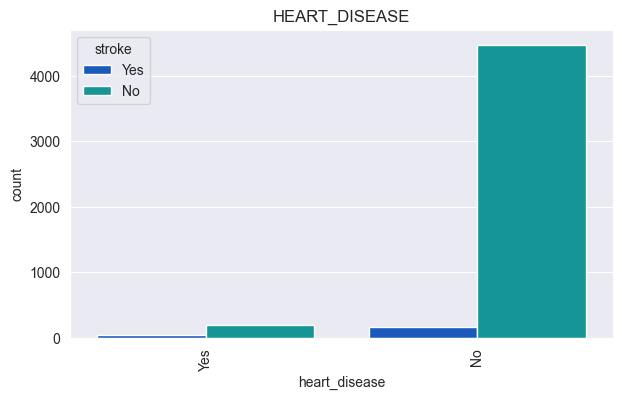

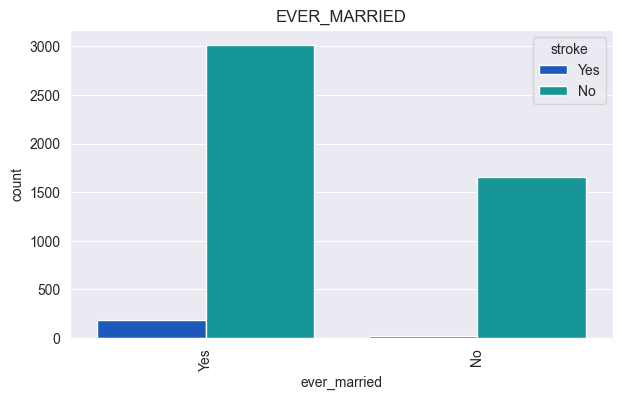

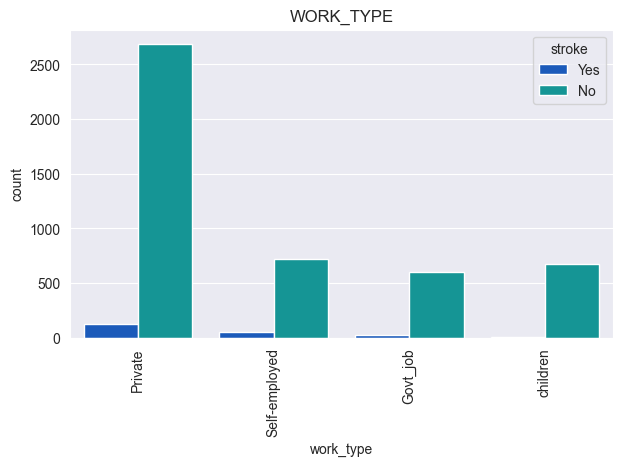

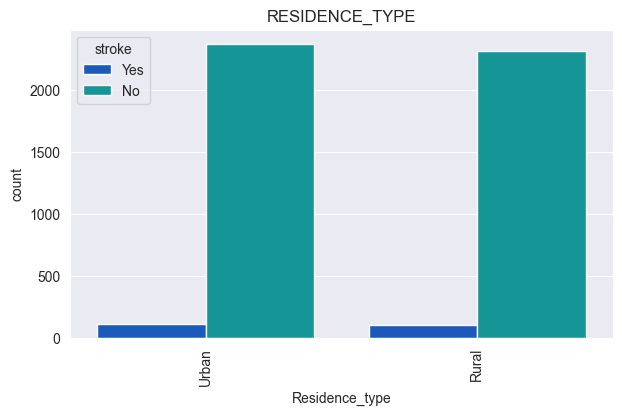

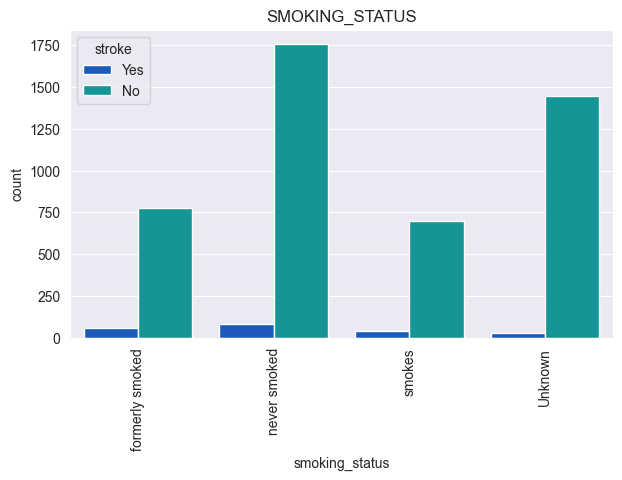

In [30]:
col = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

for i in col:
    plt.figure(figsize=(7,4))
    plt.xticks(rotation=90)
    plt.title(i.upper())
    sns.countplot(x=data[i], hue=data['stroke'], palette='winter')
    plt.show()

### Distribution of Numerical data

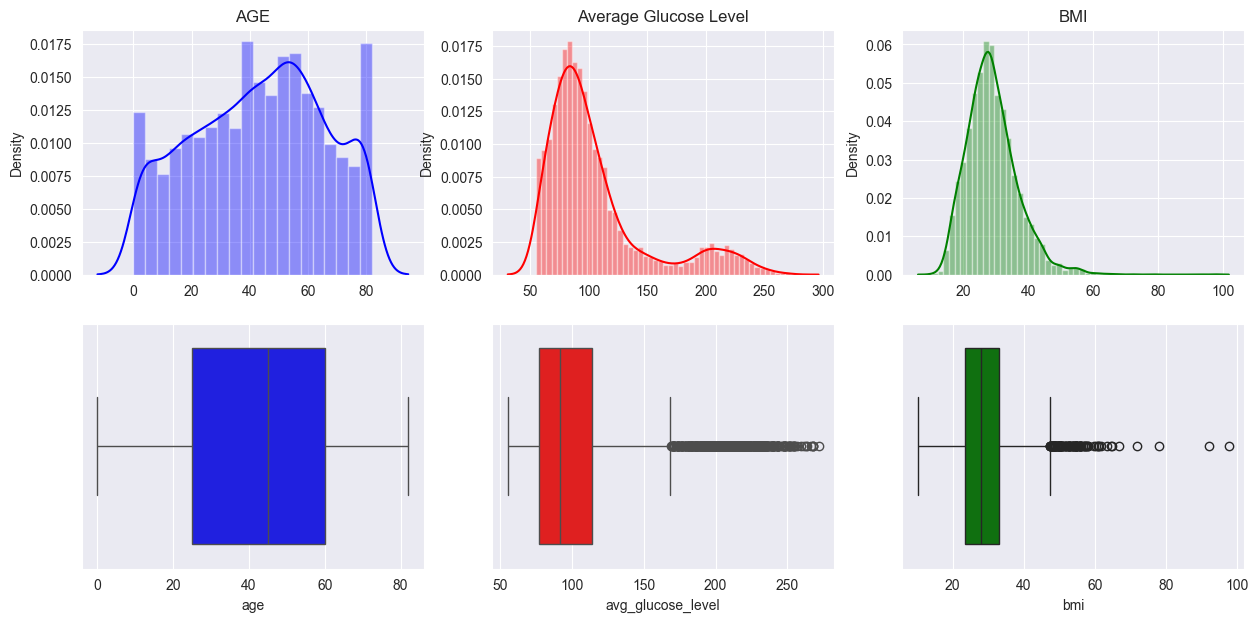

In [31]:
plt.figure(figsize=(15,7))

# Distribution of age:
plt.subplot(231)
plt.title("AGE")
sns.distplot(x=data['age'], color='b')
plt.subplot(234)
sns.boxplot(x=data['age'], color='b')

# Distribution of Average Glucose Level:
plt.subplot(232)
plt.title("Average Glucose Level")
sns.distplot(x=data['avg_glucose_level'], color='r')
plt.subplot(235)
sns.boxplot(x=data['avg_glucose_level'], color='r')

# Distribution of BMI:
plt.subplot(233)
plt.title("BMI")
sns.distplot(x=data['bmi'], color='g')
plt.subplot(236)
sns.boxplot(x=data['bmi'], color='g')

plt.show()

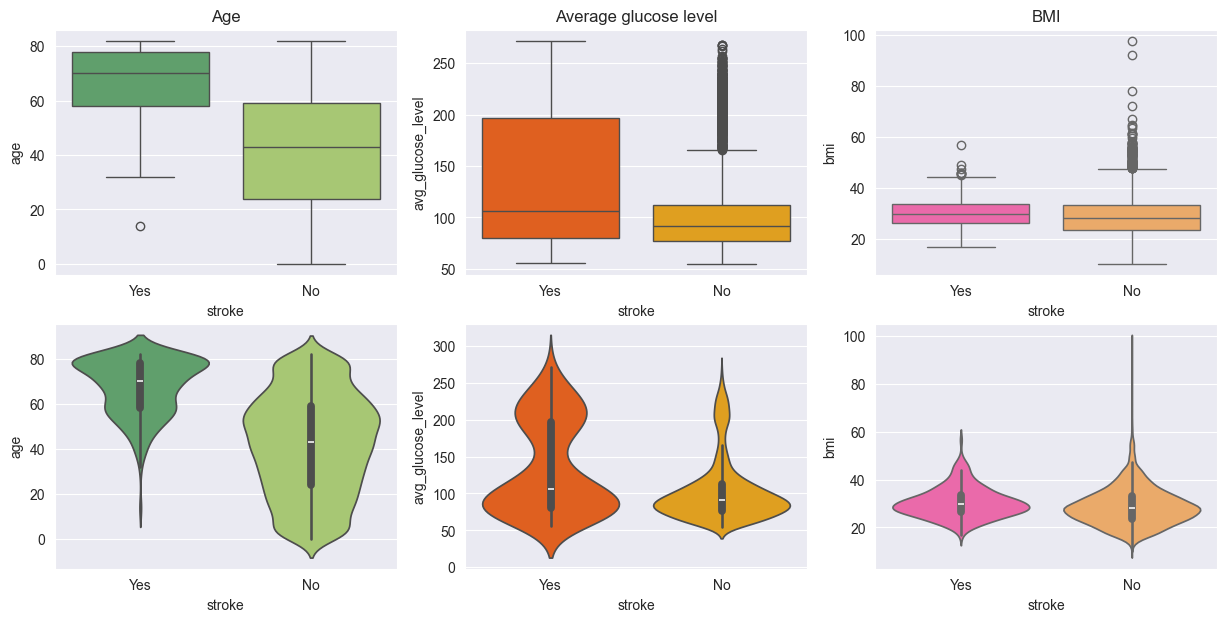

In [32]:
plt.figure(figsize=(15,7))

# Distribution of age:
plt.subplot(231)
plt.title("Age")
sns.boxplot(x=data['stroke'], y=data['age'], palette='summer')
plt.subplot(234)
sns.violinplot(x=data['stroke'], y=data['age'], palette='summer')

# Distribution of Average Glucose Level:
plt.subplot(232)
plt.title("Average glucose level")
sns.boxplot(x=data['stroke'], y=data['avg_glucose_level'], palette='autumn')
plt.subplot(235)
sns.violinplot(x=data['stroke'], y=data['avg_glucose_level'], palette='autumn')

# Distribution of BMI:
plt.subplot(233)
plt.title("BMI")
sns.boxplot(x=data['stroke'], y=data['bmi'], palette='spring')
plt.subplot(236)
sns.violinplot(x=data['stroke'], y=data['bmi'], palette='spring');

### Relationship between Numerical data

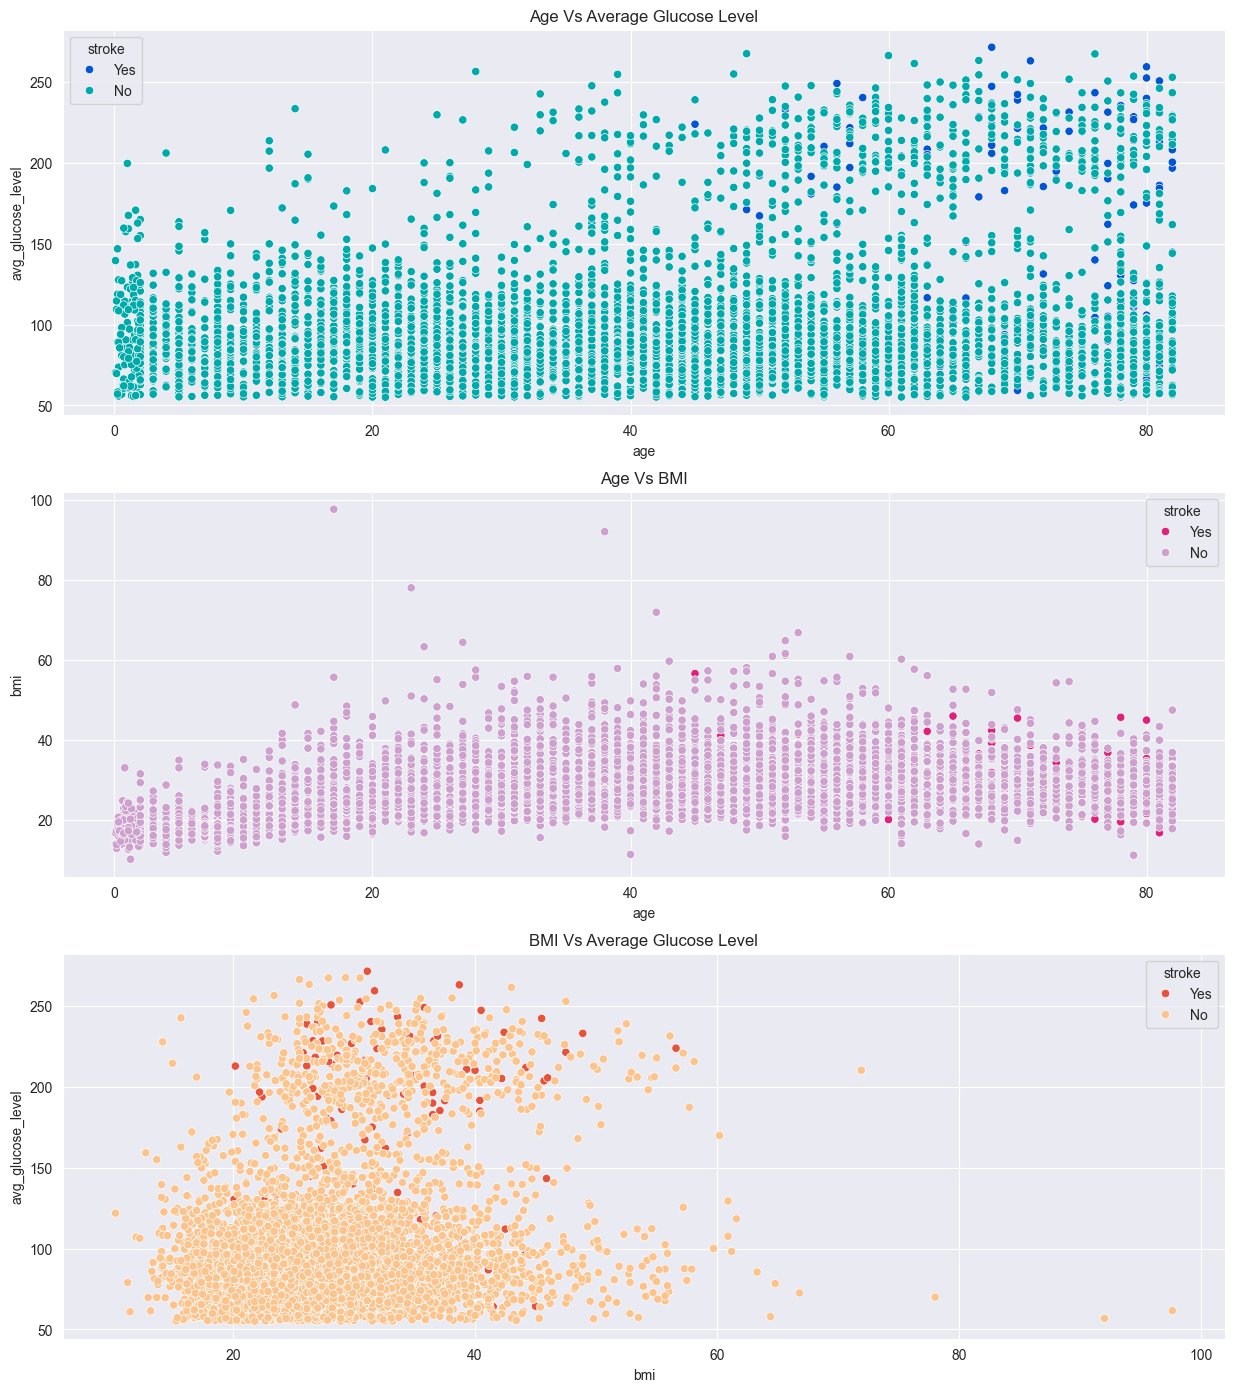

In [33]:
plt.figure(figsize=(15,17))

plt.subplot(311)
plt.title("Age Vs Average Glucose Level")
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'], hue=data['stroke'], palette='winter')

plt.subplot(312)
plt.title("Age Vs BMI")
sns.scatterplot(x=data['age'], y=data['bmi'], hue=data['stroke'], palette='PuRd_r')

plt.subplot(313)
plt.title("BMI Vs Average Glucose Level")
sns.scatterplot(x=data['bmi'], y=data['avg_glucose_level'], hue=data['stroke'], palette='OrRd_r');

* **BMI** above 60 are **outliers**. So remove all data points whose BMI is more than 60

In [34]:
data = data[data['bmi']<60]
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes


## Data Preprocessing

### Encoding of categorical features

#### Gender

In [35]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
data['gender'].replace({'Male':1, 'Female':0}, inplace=True)
data['gender'].unique()

array([1, 0], dtype=int64)

#### Hypertension

In [37]:
data['hypertension'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
data['hypertension'].replace({'Yes':1, 'No':0}, inplace=True)
data['hypertension'].unique()

array([0, 1], dtype=int64)

#### Heart Disease

In [39]:
data['heart_disease'].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
data['heart_disease'].replace({'Yes':1, 'No':0}, inplace=True)
data['heart_disease'].unique()

array([1, 0], dtype=int64)

#### Ever Married

In [41]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
data['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
data['ever_married'].unique()

array([1, 0], dtype=int64)

#### Work Type

In [43]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [44]:
data['work_type'].replace({'Private':3, 'Self-employed':2, 'Govt_job':1, 'children':0}, inplace=True)
data['work_type'].unique()

array([3, 2, 1, 0], dtype=int64)

#### Residence Type

In [45]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [46]:
data['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
data['Residence_type'].unique()

array([1, 0], dtype=int64)

#### Smoking Status

In [47]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [48]:
data['smoking_status'].replace({'formerly smoked':2, 'never smoked':1, 'smokes':3, 'Unknown':0}, inplace=True)
data['smoking_status'].unique()

array([2, 1, 3, 0], dtype=int64)

#### Stroke

In [49]:
data['stroke'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
data['stroke'].replace({'Yes':1, 'No':0}, inplace=True)
data['stroke'].unique()

array([1, 0], dtype=int64)

In [51]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,228.69,36.6,2,1
2,1,80.0,0,1,1,3,0,105.92,32.5,1,1
3,0,49.0,0,0,1,3,1,171.23,34.4,3,1
4,0,79.0,1,0,1,2,0,174.12,24.0,1,1
5,1,81.0,0,0,1,3,1,186.21,29.0,2,1


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4873 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4873 non-null   int64  
 1   age                4873 non-null   float64
 2   hypertension       4873 non-null   int64  
 3   heart_disease      4873 non-null   int64  
 4   ever_married       4873 non-null   int64  
 5   work_type          4873 non-null   int64  
 6   Residence_type     4873 non-null   int64  
 7   avg_glucose_level  4873 non-null   float64
 8   bmi                4873 non-null   float64
 9   smoking_status     4873 non-null   int64  
 10  stroke             4873 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 456.8 KB


## Heat map

In [53]:
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.029094,0.022166,0.083331,-0.035002,-0.069485,-0.003106,0.052955,-0.026419,-0.001379,0.006988
age,-0.029094,1.000000,0.275760,0.256869,0.678677,0.409796,0.012814,0.235494,0.348878,0.316954,0.232069
hypertension,0.022166,0.275760,1.000000,0.116915,0.162853,0.069044,0.001329,0.182251,0.156922,0.104336,0.143562
heart_disease,0.083331,0.256869,0.116915,1.000000,0.110636,0.053490,-0.002207,0.154699,0.045957,0.093618,0.137631
ever_married,-0.035002,0.678677,0.162853,0.110636,1.000000,0.368867,0.007383,0.150920,0.351860,0.290652,0.104536
work_type,-0.069485,0.409796,0.069044,0.053490,0.368867,1.000000,-0.008038,0.061750,0.353796,0.308146,0.056335
Residence_type,-0.003106,0.012814,0.001329,-0.002207,0.007383,-0.008038,1.000000,-0.006392,0.005207,0.028008,0.006206
avg_glucose_level,0.052955,0.235494,0.182251,0.154699,0.150920,0.061750,-0.006392,1.000000,0.186310,0.080056,0.139082
bmi,-0.026419,0.348878,0.156922,0.045957,0.351860,0.353796,0.005207,0.186310,1.000000,0.230549,0.046804
smoking_status,-0.001379,0.316954,0.104336,0.093618,0.290652,0.308146,0.028008,0.080056,0.230549,1.000000,0.069678


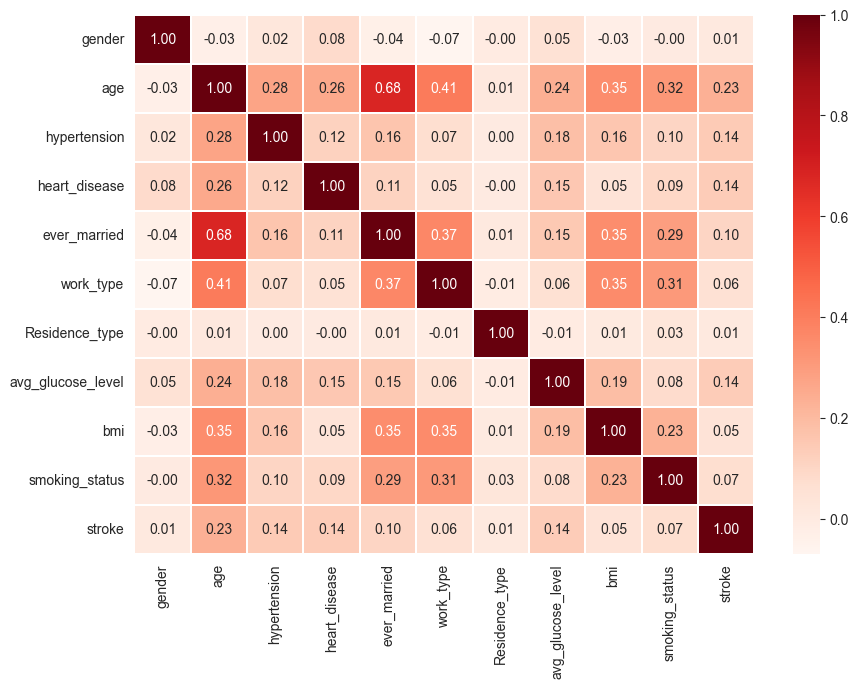

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt='0.2f', cmap='Reds', linewidths=0.2, linecolor='white')
plt.show()

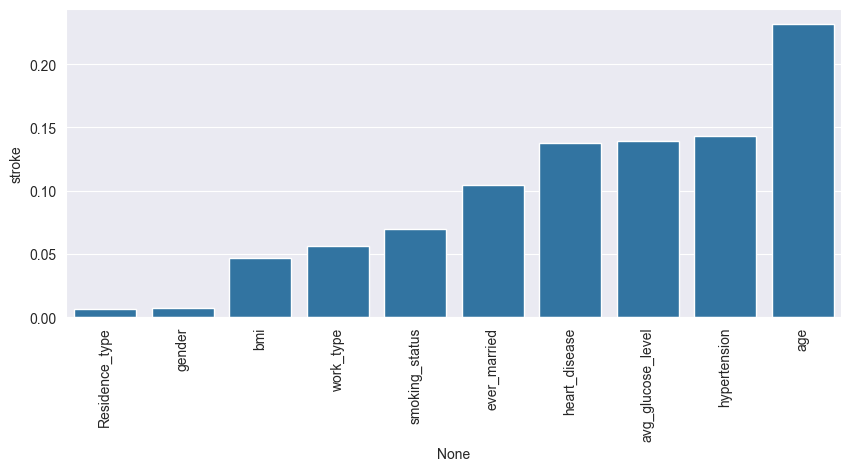

In [57]:
plt.figure(figsize=(10,4))

plt.xticks(rotation=90)
sns.barplot(x=data.corr().sort_values(by='stroke').index[0:-1],
            y=data.corr().sort_values(by='stroke').stroke[0:-1])

plt.show()

## Splitting the dataset into independent and dependent features

In [62]:
X = data.drop('stroke', axis=1)
Y = data['stroke']

In [63]:
X.shape, Y.shape

((4873, 10), (4873,))

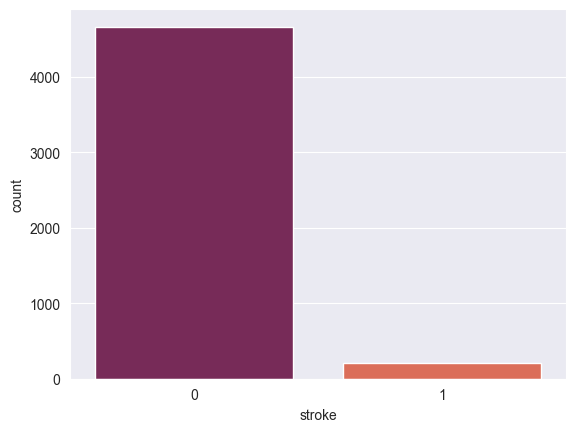

In [72]:
sns.countplot(x=Y, palette='rocket');

In [76]:
from collections import Counter
print('Original Shape is:  {} '.format(Counter(Y)))

Original Shape is:  Counter({0: 4664, 1: 209}) 


**The data is Highly imbalance. So, we need to balance the dataset**

### Balancing the dataset using Synthetic Minority Over-sampling Technique (SMOTE)

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_smote,Y_smote = sm.fit_resample(X,Y)

print('Original Shape is:  {} '.format(Counter(Y)))
print('Resampled Shape is:  {} '.format(Counter(Y_smote)))

Original Shape is:  Counter({0: 4664, 1: 209}) 
Resampled Shape is:  Counter({1: 4664, 0: 4664}) 


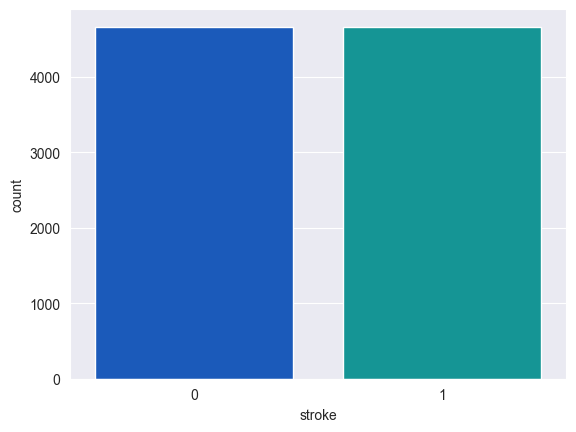

In [80]:
sns.countplot(x=Y_smote, palette='winter');

### Splitting the dataset into Training,Validation and Testing dataset:

In [81]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(X_smote, Y_smote, test_size=0.3, random_state=45)

## Feature Selection

In [86]:
from sklearn.feature_selection import mutual_info_classif

mutualinfo = mutual_info_classif(X, Y)
mutualinfo

array([0.0241896 , 0.52106154, 0.00426814, 0.00892244, 0.01810578,
       0.08872125, 0.01826947, 0.08088108, 0.44248468, 0.04306023])

In [96]:
from sklearn.feature_selection import SelectKBest

col = SelectKBest(mutual_info_classif, k=6)
col.fit(X, Y)

print(col.get_support())
X.columns[col.get_support()]

[False  True False False False  True  True  True  True  True]


Index(['age', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [97]:
col = list(X.columns[col.get_support()])
col

['age',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [101]:
X = X[col]
X_test = X_test[col]

In [102]:
X.head()

,age,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3111,56.000000,3,0,163.020000,29.600000,1
5831,81.980029,3,0,59.387002,33.221968,1
9310,55.526961,2,1,184.167157,37.396200,1
9060,49.504082,3,0,89.576245,28.848775,1
4852,51.000000,3,1,152.560000,21.800000,0


In [103]:
X_test.head()

,age,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5575,77.746398,2,0,126.313215,28.115847,1
1280,62.000000,3,0,126.990000,29.400000,2
3607,19.000000,3,1,76.570000,26.600000,0
3072,0.560000,0,0,127.230000,20.100000,0
5914,80.000000,2,0,255.201839,30.931000,2


## Models

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=45)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [106]:
# Creating object for different types of classification models:

lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
rfc=RandomForestClassifier()
nbc=MultinomialNB()
knn=KNeighborsClassifier()

In [107]:
# Accuracy of all the above model:

from sklearn.metrics import accuracy_score

model_name = ["LogisticRegression","DecisionTreeClassifier","SVC",
              "RandomForestClassifier","MultinomialNB","KNeighborsClassifier"]

model_obj = [lr,dtc,svc,rfc,nbc,knn]

model=[]
accuracy=[]

for i,j in zip(model_name, model_obj):
    
    # Fitting the model with train data:
    j.fit(X_train, Y_train)
    
    # Predicting the values of X_test:
    Y_pred = j.predict(X_val)
    
    # Accuracy of the model:
    acc = accuracy_score(Y_val,Y_pred)
    acc = round(acc*100, 2)
    
    model.append(i)
    accuracy.append(acc)
    

df1 = pd.DataFrame()
df1['Model']=model
df1['Accuracy']=accuracy

# Printing the dataframe
df1 = df1.sort_values(by='Accuracy', ascending=False)
df1

,Model,Accuracy
3,RandomForestClassifier,92.11
1,DecisionTreeClassifier,88.67
5,KNeighborsClassifier,87.90
0,LogisticRegression,79.48
2,SVC,76.42
4,MultinomialNB,71.82


In [108]:
# Log loss for all the models:

from sklearn.metrics import log_loss

model_name = ["LogisticRegression","DecisionTreeClassifier","SVC",
              "RandomForestClassifier","MultinomialNB","KNeighborsClassifier"]

model_obj = [lr,dtc,svc,rfc,nbc,knn]

model=[]
loss=[]

for i,j in zip(model_name, model_obj):
    
    # Fitting the model with train data:
    j.fit(X_train, Y_train)
    
    # Predicting the values of X_test:
    Y_pred = j.predict(X_val)
    
    # Accuracy of the model:
    los = log_loss(Y_val,Y_pred)
    los = round(los, 2)
    
    model.append(i)
    loss.append(los)
    

df2 = pd.DataFrame()
df2['Model']=model
df2['Log Loss']=loss

# Printing the dataframe:
df2 = df2.sort_values(by='Log Loss')
df2

,Model,Log Loss
3,RandomForestClassifier,2.76
1,DecisionTreeClassifier,4.14
5,KNeighborsClassifier,4.36
0,LogisticRegression,7.40
2,SVC,8.50
4,MultinomialNB,10.16


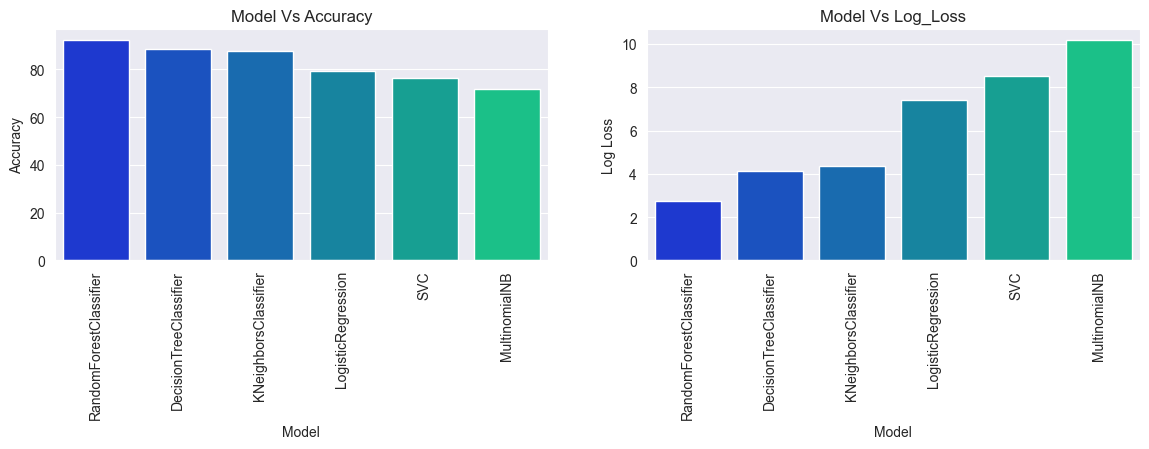

In [113]:
# Comparing the models with Accuracy and Log_Loss:

plt.figure(figsize=(14,3))

plt.subplot(121)
plt.title("Model Vs Accuracy")
plt.xticks(rotation=90)
sns.barplot(x=df1['Model'], y=df1['Accuracy'], palette='winter')

plt.subplot(122)
plt.title("Model Vs Log_Loss")
plt.xticks(rotation=90)
sns.barplot(x=df2['Model'], y=df2['Log Loss'], palette='winter')

plt.show()

**Let us choose top 2 algorithm which have more accuracy and less log loss**

### Evaluation of top 2 Algorithm

In [114]:
from sklearn.metrics import classification_report

model_name = ["DecisionTreeClassifier", "RandomForestClassifier"]
model_obj = [dtc,rfc]

for i,j in zip(model_name, model_obj):
    
    # Fitting the model with train data:
    j.fit(X_train, Y_train)
    
    # Predicting the values of X_test:
    Y_pred = j.predict(X_val)
    
    c_report = classification_report(Y_val,Y_pred)
    print(i,'\n')
    print(c_report)
    print('='*80)

DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       652
           1       0.87      0.90      0.88       654

    accuracy                           0.88      1306
   macro avg       0.88      0.88      0.88      1306
weighted avg       0.88      0.88      0.88      1306

RandomForestClassifier 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       652
           1       0.89      0.96      0.92       654

    accuracy                           0.92      1306
   macro avg       0.92      0.92      0.92      1306
weighted avg       0.92      0.92      0.92      1306



* **Out of two algorithms Random Forest Classifier has the better f1-score for both positive and negative class.**
* **So, we can choose Random Forest Classifier**

### Random Forest Classifier

#### Let us perform cross validation and hyperparameter tuning for better performance of the model

In [115]:
# Cross Validation:

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=45)
rf = RandomForestClassifier()
results = cross_val_score(rf, X,Y, cv=kfold)

print(round(results.mean(),2))

0.93


In [118]:
# Hyperparameter Tuning:

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators':[50,100,200,300],
              'criterion':['gini','entropy'],
              'max_depth':[10,20,30],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4],
              'max_features':['sqrt','log2']}


hps = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=kfold)
hps.fit(X,Y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]})

In [120]:
# Now let us look the best parameters:
hps.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy'}

In [121]:
# Now letus start building our model:

model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1,
                               max_features='log2', max_depth=30, criterion='entropy')

model.fit(X,Y)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_split=5, n_estimators=200)

In [122]:
# Prediction:
Y_predict = model.predict(X_test)

In [123]:
# Accuracy:
acc = accuracy_score(Y_test,Y_predict)
print('Accuracy Score: {}% '.format(round(acc*100, 2)))

Accuracy Score: 92.89% 


In [124]:
# Classification Report:
classification_report(Y_test, Y_predict).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.96      0.89      0.92      1372',
 '           1       0.90      0.96      0.93      1427',
 '',
 '    accuracy                           0.93      2799',
 '   macro avg       0.93      0.93      0.93      2799',
 'weighted avg       0.93      0.93      0.93      2799',
 '']

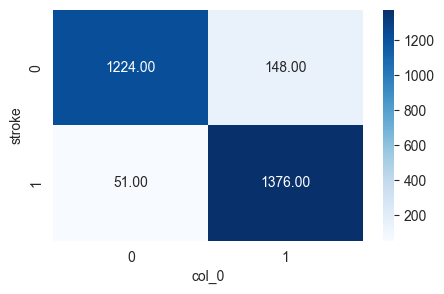

In [125]:
df3 = pd.crosstab(Y_test, Y_predict)

plt.figure(figsize=(5,3))
sns.heatmap(df3, annot=True, fmt='0.2f', cmap='Blues')
plt.show()

### ROC and AUC

In [129]:
from sklearn.metrics import roc_curve, auc

prob = model.predict_proba(X_test)
prob

array([[0.01916667, 0.98083333],
       [0.51765079, 0.48234921],
       [0.99666667, 0.00333333],
       ...,
       [0.35861508, 0.64138492],
       [0.03163889, 0.96836111],
       [0.15972619, 0.84027381]])

In [130]:
fpr,tpr,thresholds = roc_curve(Y_test, prob[:,1])

roc_auc = auc(fpr,tpr)
print("Area Under the Curve is: {}".format(roc_auc))

Area Under the Curve is: 0.9841808131802124


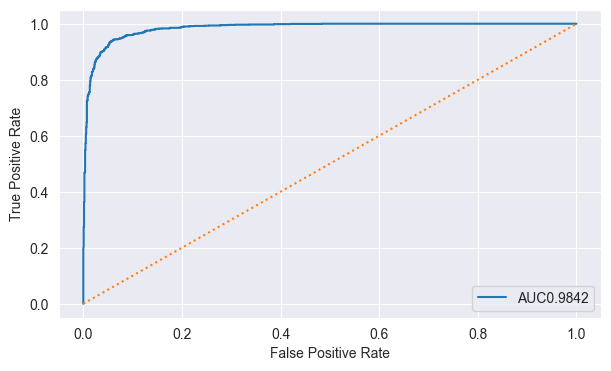

In [131]:
plt.figure(figsize=(7,4))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.plot(fpr, tpr, label='AUC{}'.format(round(roc_auc, 4)))
plt.plot(tpr,tpr, linestyle=':')

plt.legend()

plt.show()

**As, we can see that the AUC value is 0.9842 which is very much good. Now we can save this model for deployment.**

## Saving the model

In [132]:
# Saving the model into a pickle file:
import pickle

with open("Stroke_predictor.pickle", 'wb') as file:
    pickle.dump(model, file)

file.close() 

In [135]:
# Saving the column into a json file:
import json

columns = {'data_columns':list(X_test.columns)}

with open("columns.json", 'w') as file:
    json.dump(columns, file)
    
file.close()

### Testing the model

In [136]:
# Load the model:

with open("Stroke_predictor.pickle", 'rb') as file:
    mod = pickle.load(file)

file.close()

In [142]:
def stroke_pred():
    
    age = int(input("Enter your age: "))
    work = input("What is the type of your work: ")
    residence = input("Where do you live: ")
    avg_glu_lvl = float(input("Enter your average glucose level: "))
    bmi = float(input("Enter your bmi: "))
    smoke = input("Smoking Status: ")
    
    a = np.zeros(len(X_test.columns))
    
    # age:
    a[0]=age
    
    
    # work_type:
    if work=='children':
        a[1]=0
    elif work=='govt_job':
        a[1]=1
    elif work=='self_employed':
        a[1]=2
    elif work=='private':
        a[1]=3
        

    # Residence_type:
    if residence=='urban':
        a[2]=1
    elif residence=='rural':
        a[2]=0
        

    # avg_glucose_level:
    a[3]=avg_glu_lvl
    

    # bmi:
    a[4]=bmi
    

    # smoking_status:
    if smoke=='unknown':
        a[5]=0
    elif smoke=='never smoked':
        a[5]=1
    elif smoke=='formerly smoked':
        a[5]=2
    elif smoke=='smokes':
        a[5]=3
        
        
    # Stroke:
    stroke = mod.predict([a])[0]
    
    if stroke==1:
        return print("You have a high chance of getting Stroke. So, please consult your doctor!")
    else:
        return print("You have a less chance of getting Stroke!")
       

### Predicting with new data

In [143]:
stroke_pred()

You have very less chance of getting Stroke!


In [144]:
stroke_pred()

You have the high chance of getting Stroke. So, please your doctor!
